In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-34.866186372808144 -144.02178504491326
2.2432032818099117 -7.374431141689627
-9.383930626904743 -31.107883278960912
37.680238206825464 90.44279364102931
86.50626763754042 136.9677608428742
-42.45928539676574 -40.25640649585148
27.089189220963704 -74.85268754064853
2.569747976207452 100.09180046424615
-17.045074836946952 -76.51571113457877
30.549515561801442 -8.734063057437169
11.65220287130937 81.6006359367102
-58.60828427898649 152.68102076663632
0.8466295418727583 -87.51718480329114
10.641225112057526 113.93654349118793
32.16499052220901 -141.57870551245307
-0.07238602718479115 50.27918159347419
-18.015243540641762 156.5516648957514
36.805739419646926 -120.56242954474456
-8.337364716937458 32.49312706025347
17.591463359371303 51.18535674789945
15.18950941861128 107.0088679478722
63.52353901618696 -83.50659593789118
-30.852026542684946 112.42133580505146
75.66998942056128 67.67537112979156
76.84018031711864 -26.69671365828509
44.74403926413595 171.30886328809532
-41.37874634195281 -7

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


626

In [12]:
# Import requests library and weather_api_key
import requests
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35e1028a1bc50289e9eea7894051015e


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data. (6.2.6)
#In the code block, we have initialized the counters at 1 because we want the first iteration
#of the logging for each recorded response and the set to start at 1.

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | harper
Processing Record 3 of Set 1 | olinda
Processing Record 4 of Set 1 | korla
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | teluk nibung
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | tarudant
City not found. Skipping...
Processing Record 11 of Set 1 | mamallapuram
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | taburi
City not found. Skipping...
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | mogadishu
Processing Record 17 of Set 1 | yeppoon
Processing Record 18 of Set 1 | mendota
Processing Record 19 of Set 1 | laela
Processing Record 20 of Set 1 | salalah
Processing Recor

Processing Record 37 of Set 4 | russell
Processing Record 38 of Set 4 | wiset chai chan
Processing Record 39 of Set 4 | aklavik
Processing Record 40 of Set 4 | hurricane
Processing Record 41 of Set 4 | pangnirtung
Processing Record 42 of Set 4 | fort saint john
City not found. Skipping...
Processing Record 43 of Set 4 | zirgan
Processing Record 44 of Set 4 | asilah
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | constantine
Processing Record 47 of Set 4 | gigmoto
Processing Record 48 of Set 4 | kushtagi
Processing Record 49 of Set 4 | ust-tsilma
Processing Record 50 of Set 4 | sao joao da barra
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | sarangani
Processing Record 3 of Set 5 | tobias barreto
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | diego de almagro
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | filadelfia
Processi

Processing Record 28 of Set 8 | del rio
Processing Record 29 of Set 8 | asfi
Processing Record 30 of Set 8 | nguiu
City not found. Skipping...
Processing Record 31 of Set 8 | uusikaupunki
Processing Record 32 of Set 8 | pinega
Processing Record 33 of Set 8 | christchurch
Processing Record 34 of Set 8 | aksarka
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | hereford
Processing Record 37 of Set 8 | hedaru
Processing Record 38 of Set 8 | ambunti
Processing Record 39 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 40 of Set 8 | conde
Processing Record 41 of Set 8 | aginskoye
Processing Record 42 of Set 8 | igis
Processing Record 43 of Set 8 | airai
Processing Record 44 of Set 8 | iracoubo
Processing Record 45 of Set 8 | narsaq
Processing Record 46 of Set 8 | kupang
Processing Record 47 of Set 8 | bonavista
Processing Record 48 of Set 8 | bondoukou
Processing Record 49 of Set 8 | tupa
Processing Record 50 of Set 8 | jalalabad
Processing Record 

Processing Record 15 of Set 12 | zhumadian
Processing Record 16 of Set 12 | kousseri
Processing Record 17 of Set 12 | bom jesus do itabapoana
Processing Record 18 of Set 12 | xuddur
Processing Record 19 of Set 12 | cordele
Processing Record 20 of Set 12 | atkinson
Processing Record 21 of Set 12 | chernaya kholunitsa
Processing Record 22 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 23 of Set 12 | buala
Processing Record 24 of Set 12 | pochutla
Processing Record 25 of Set 12 | santa maria
Processing Record 26 of Set 12 | kahului
Processing Record 27 of Set 12 | anchorage
Processing Record 28 of Set 12 | catuday
Processing Record 29 of Set 12 | zhezkazgan
Processing Record 30 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | ape
Processing Record 33 of Set 12 | voznesenye
Processing Record 34 of Set 12 | werda
Processing Record 35 of Set 12 | luanda
Processing Record 36 of Set 12 | paratinga
Pr

In [15]:
len(city_data)

570

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,77.74,38,92,5.26,NZ,2023-01-02 02:56:13
1,Harper,4.3750,-7.7169,76.26,77,0,1.52,LR,2023-01-02 02:56:13
2,Olinda,-8.0089,-34.8553,80.33,78,75,6.91,BR,2023-01-02 02:56:14
3,Korla,41.7597,86.1469,20.25,55,0,1.01,CN,2023-01-02 02:56:14
4,Rio Grande,-32.0350,-52.0986,74.32,88,100,19.04,BR,2023-01-02 02:56:15
5,Marsh Harbour,26.5412,-77.0636,75.85,80,10,8.52,BS,2023-01-02 02:54:51
6,Teluk Nibung,3.0010,99.8164,80.46,74,96,7.74,ID,2023-01-02 02:56:16
7,Mamallapuram,12.6264,80.1722,75.25,65,40,3.94,IN,2023-01-02 02:56:17
8,Hobart,-42.8794,147.3294,83.26,78,40,14.97,AU,2023-01-02 02:56:17
9,San Cristobal,7.7669,-72.2250,66.38,97,63,2.64,VE,2023-01-02 02:52:17


In [17]:
# Reorder the columns in the order you want them to appear.
new_column_order = ["City", "Country", "Date", "Lat",
                    "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 

# Assign a new or the same DataFrame the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-10-18 02:18:28,5.4112,100.3354,84.13,78,20,0.00
1,Aklavik,CA,2022-10-18 02:22:42,68.2191,-135.0107,26.51,91,100,4.47
2,Yar-Sale,RU,2022-10-18 02:22:43,66.8333,70.8333,34.32,93,71,13.76
3,Teknaf,BD,2022-10-18 02:22:43,20.8624,92.3058,79.12,86,98,3.94
4,Fortuna,US,2022-10-18 02:22:44,40.5982,-124.1573,61.93,82,0,8.05
5,Pevek,RU,2022-10-18 02:22:44,69.7008,170.3133,4.77,93,70,5.06
6,Jadu,LY,2022-10-18 02:22:45,31.9530,12.0261,58.66,74,0,5.68
7,San Rafael,AR,2022-10-18 02:22:45,-34.6177,-68.3301,53.56,85,100,14.03
8,Clyde River,CA,2022-10-18 02:22:46,70.4692,-68.5914,23.23,86,100,6.91
9,Jamestown,US,2022-10-18 02:22:46,42.0970,-79.2353,40.59,68,75,18.41


In [17]:
# Create the output File (CSV)
output_data_file = "weather_data/clean_cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()


City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

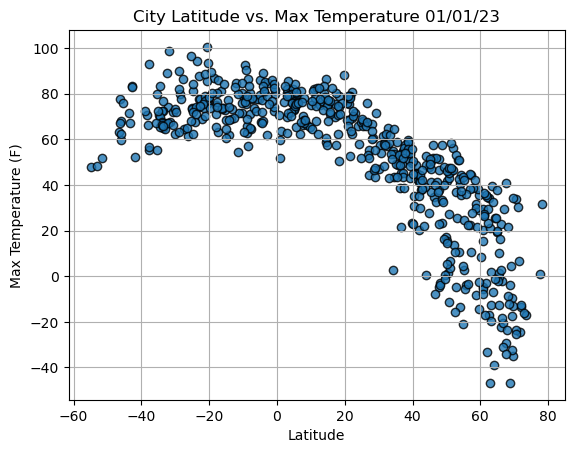

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


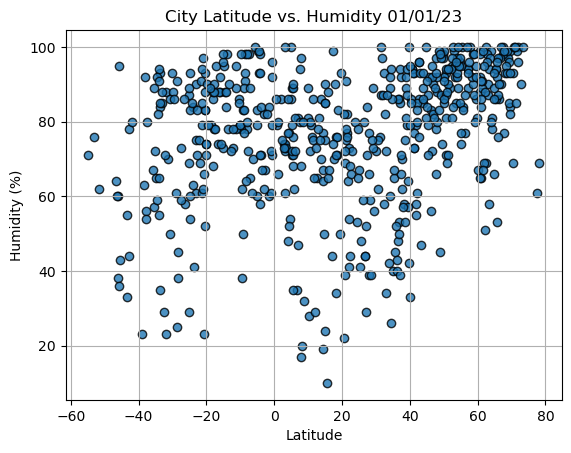

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

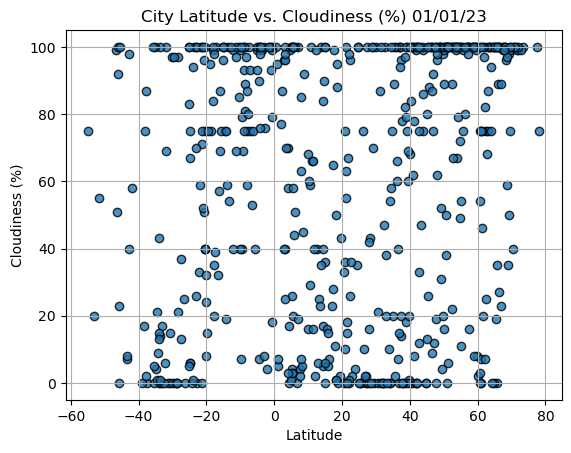

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

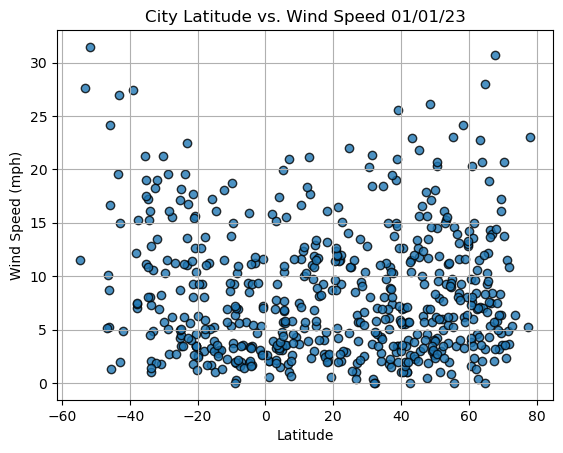

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                      Mendota
Lat                       36.7536
Lng                     -120.3816
Max Temp                    49.32
Humidity                       53
Cloudiness                      0
Wind Speed                  10.83
Country                        US
Date          2023-01-02 02:56:20
Name: 13, dtype: object

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Harper,4.3750,-7.7169,76.26,77,0,1.52,LR,2023-01-02 02:56:13
3,Korla,41.7597,86.1469,20.25,55,0,1.01,CN,2023-01-02 02:56:14
5,Marsh Harbour,26.5412,-77.0636,75.85,80,10,8.52,BS,2023-01-02 02:54:51
6,Teluk Nibung,3.0010,99.8164,80.46,74,96,7.74,ID,2023-01-02 02:56:16
7,Mamallapuram,12.6264,80.1722,75.25,65,40,3.94,IN,2023-01-02 02:56:17


In [29]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

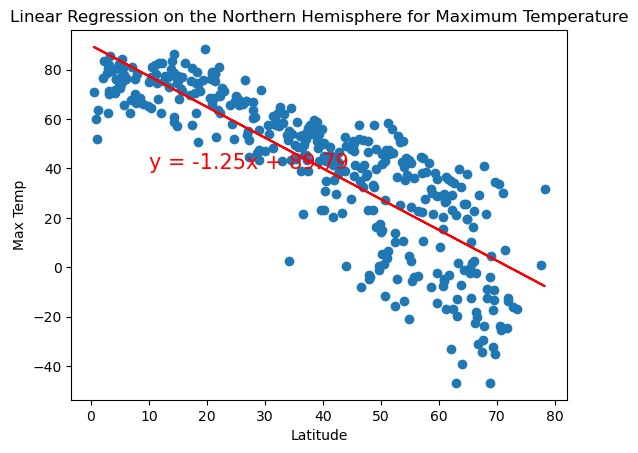

In [38]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


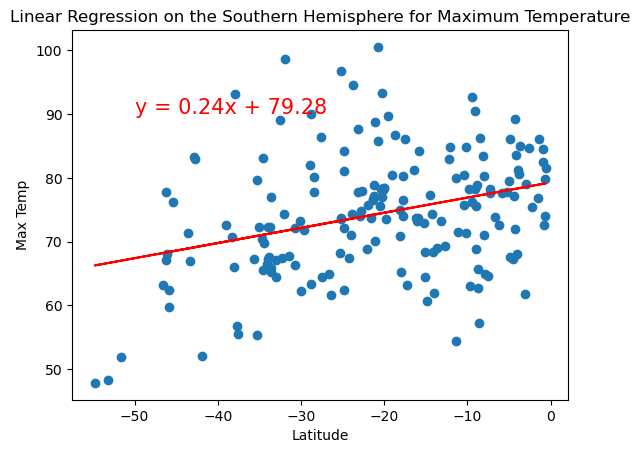

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)

p_value

3.965974606766802e-103

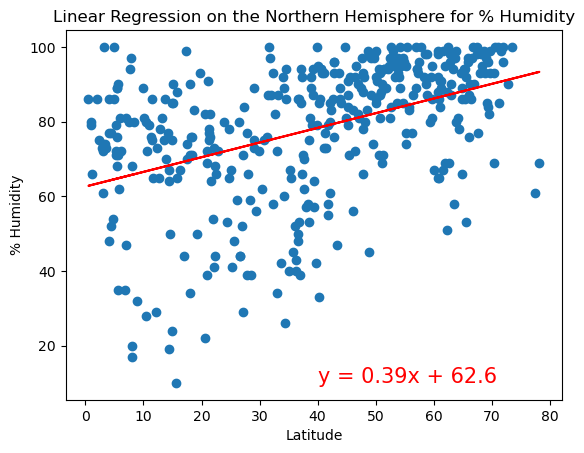

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

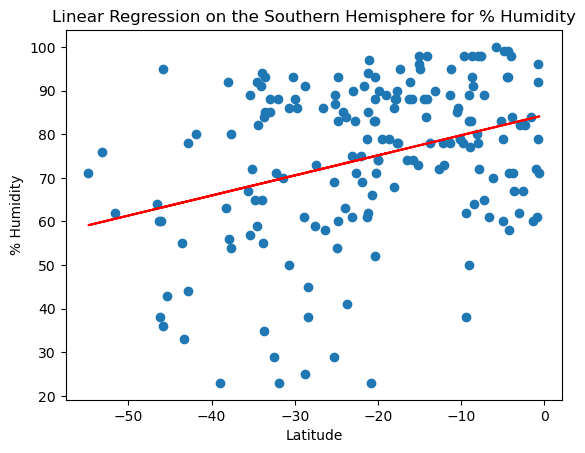

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

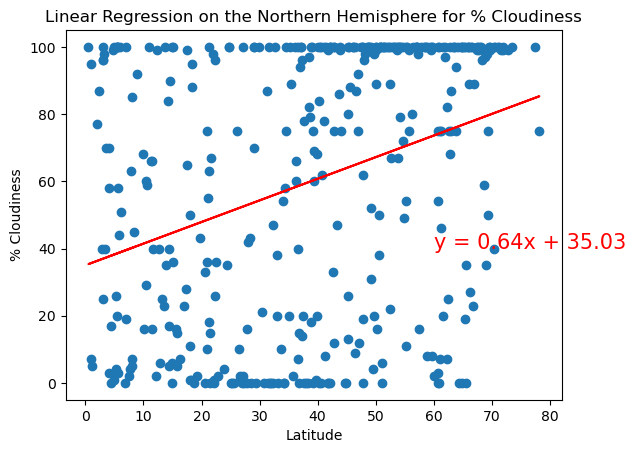

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(60,40))

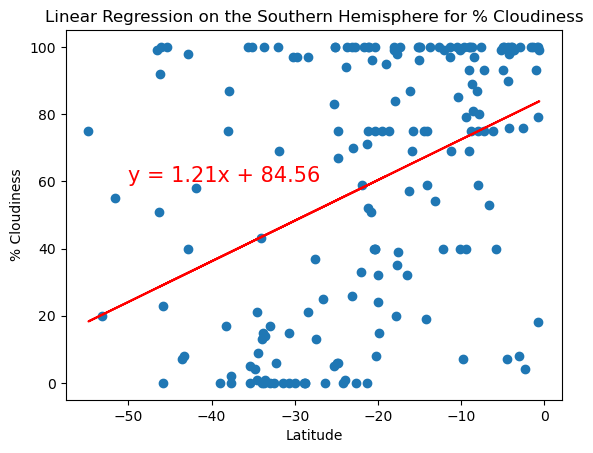

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

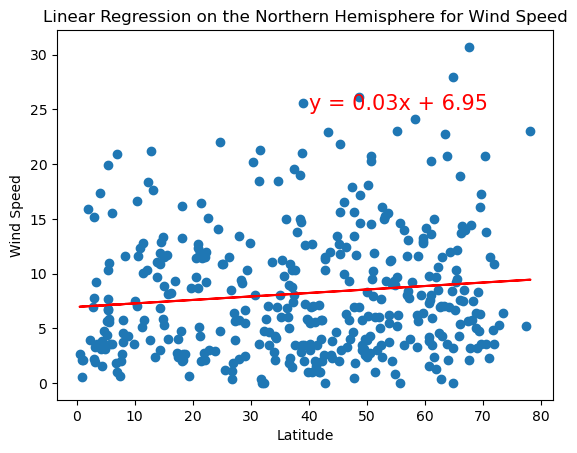

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,25))


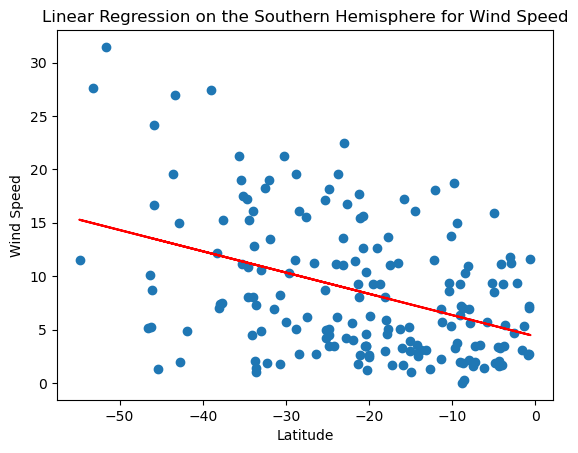

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))
